In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
banks = pd.read_csv('~/Desktop/Thinkful-Projects/banks.csv')
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 12 columns):
Financial Institution Number    2883 non-null float64
Institution Name                3484 non-null object
Institution Type                3484 non-null object
Charter Type                    3484 non-null object
Headquarters                    3484 non-null object
Failure Date                    3484 non-null object
Insurance Fund                  3484 non-null object
Certificate Number              2999 non-null float64
Transaction Type                3484 non-null object
Total Deposits                  3484 non-null int64
Total Assets                    3333 non-null float64
Estimated Loss (2015)           2509 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 326.7+ KB


# Some text 

In [94]:
print(banks)

      Financial Institution Number  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   
5                              NaN   
6                              NaN   
7                              NaN   
8                              NaN   
9                              NaN   
10                             NaN   
11                             NaN   
12                             NaN   
13                             NaN   
14                             NaN   
15                             NaN   
16                             NaN   
17                             NaN   
18                             NaN   
19                             NaN   
20                             NaN   
21                             NaN   
22                             NaN   
23                             NaN   
24                             NaN   
25          

In [95]:
banks.columns.values

array(['Financial Institution Number', 'Institution Name',
       'Institution Type', 'Charter Type', 'Headquarters', 'Failure Date',
       'Insurance Fund', 'Certificate Number', 'Transaction Type',
       'Total Deposits', 'Total Assets', 'Estimated Loss (2015)'], dtype=object)

In [124]:
banks['Failure Year']=banks['Failure Date'].apply(lambda x: int(x.split('/')[2]))
banks['City']=banks['Headquarters'].apply(lambda x:(x.split(',')[0]))
banks['State']=banks['Headquarters'].apply(lambda x:(x.split(', ')[1]))

In [123]:
banks.head()

#banks['Closing Year'] = banks['Closing Date'].apply(lambda x: int(x.split('-')[2]))

,Financial Institution Number,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015),Failure Year,City,State
0,NaN,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",4/19/1934,FDIC,NaN,PAYOUT,1064,1435.0,NaN,1934,PITTSBURGH,PA
1,NaN,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",5/28/1934,FDIC,NaN,PAYOUT,238,374.0,NaN,1934,EAST PEORIA,IL
2,NaN,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",7/18/1934,FDIC,NaN,PAYOUT,42,91.0,NaN,1934,LIMA,MT
3,NaN,FLORENCE DEPOSIT BANK,COMMERCIAL BANK,STATE,"FLORENCE, IN",7/18/1934,FDIC,NaN,PAYOUT,69,105.0,NaN,1934,FLORENCE,IN
4,NaN,BANK OF LEWISPORT,COMMERCIAL BANK,STATE,"LEWISPORT, KY",8/6/1934,FDIC,NaN,PAYOUT,68,81.0,NaN,1934,LEWISPORT,KY


In [98]:
banks.isnull().sum()

Financial Institution Number    601
Institution Name                  0
Institution Type                  0
Charter Type                      0
Headquarters                      0
Failure Date                      0
Insurance Fund                    0
Certificate Number              485
Transaction Type                  0
Total Deposits                    0
Total Assets                    151
Estimated Loss (2015)           975
Failure Year                      0
City                              0
State                             0
dtype: int64

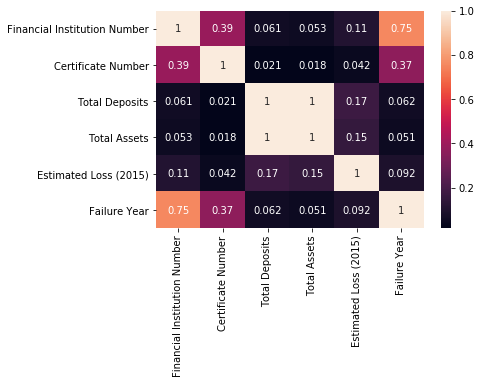

In [131]:
corr = banks[banks.columns].corr()
sns.heatmap(corr, annot = True)

In [99]:
banks.groupby('Failure Year')['Institution Name'].agg('count')

Failure Year
1934      9
1935     25
1936     69
1937     75
1938     74
1939     60
1940     43
1941     15
1942     20
1943      5
1944      2
1945      1
1946      1
1947      5
1948      3
1949      4
1950      4
1951      2
1952      3
1953      2
1954      2
1955      5
1956      2
1957      1
1958      4
1959      3
1960      1
1961      5
1962      1
1963      2
       ... 
1986    161
1987    217
1988    232
1989    530
1990    380
1991    268
1992    178
1993     50
1994     15
1995      8
1996      6
1997      1
1998      3
1999      8
2000      7
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    154
2011     92
2012     51
2013     24
2014     18
2015      7
2016      5
2017      2
Name: Institution Name, Length: 82, dtype: int64

Text(0,0.5,'Bank Failures')

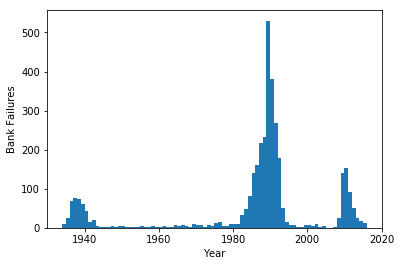

In [100]:
plt.hist(banks['Failure Year'], bins=range(1934,2017))
plt.xlabel('Year')
plt.ylabel('Bank Failures')

In [136]:
plt.plot(banks['Failure Year']

plt.xlabel('Year')
plt.ylabel('Bank Failures')

SyntaxError: invalid syntax (<ipython-input-136-66c4e11db475>, line 3)

Text(0,0.5,'Bank Failures')

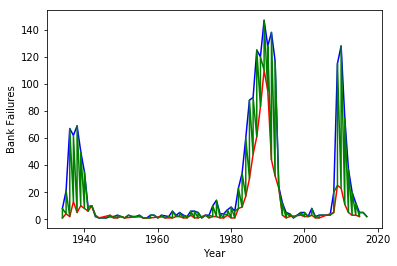

In [139]:
failure_year_type = banks.groupby(['Failure Year', 'Charter Type'], as_index=False)['Institution Name'].agg('count')
failure_year_type.columns=['Failure Year', 'Charter Type', 'Number of Failures']

failure_year_state = failure_year_type[failure_year_type['Charter Type']=='STATE']
failure_year_federal = failure_year_type[failure_year_type['Charter Type']=='FEDERAL']
#failure_year_all = failure_year_type[failure_year_type['Charter Type']=='STATE'| failure_year_type['Charter Type']=='FEDERAL']
failure_year_all = failure_year_type[(failure_year_type['Charter Type']=='STATE') | (failure_year_type['Charter Type']=='FEDERAL')]


plt.plot(failure_year_state['Failure Year'], failure_year_state['Number of Failures'], 'b-')
plt.plot(failure_year_federal['Failure Year'], failure_year_federal['Number of Failures'], 'r-')
plt.plot(failure_year_all['Failure Year'], failure_year_all['Number of Failures'], 'g-')


plt.xlabel('Year')
plt.ylabel('Bank Failures')





In [102]:
banks['Failure Date'].unique()

array(['4/19/1934 ', '5/28/1934 ', '7/18/1934 ', ..., '9/23/2016 ',
       '1/13/2017 ', '1/27/2017 '], dtype=object)

,State,Institution Name
44,TX,736
4,CA,236
14,IL,181
9,FL,178
37,OK,170


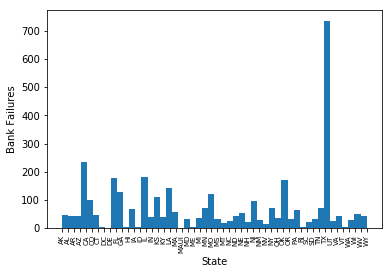

In [126]:
plt.hist(banks['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('State')
plt.ylabel('Bank Failures')

banks_by_state = banks.groupby('State', as_index=False)['Institution Name'].agg('count')
banks_by_state.sort_values(by='Institution Name', ascending=False).iloc[0:5]

In [104]:
#which banks are aquiring
#rate of failure highest or lowest

#Goals for next time play around with pandas and matplotlib


In [105]:
df['Closing Date']=pd.to_datetime(df['Closing Date'])

NameError: name 'df' is not defined

In [ ]:
df.sort_values(['ST', 'City', 'Closing Date'], ascending=[1, 1, 1])

In [ ]:
State_Count=df.groupby(['ST'], as_index=False)['Closing Date'].agg('count')

In [ ]:
State_Count.columns=['ST', 'Failure_num']

In [ ]:
print(State_Count)

In [ ]:
plt.scatter(State_Count['ST'], State_Count['Failure_num'])
plt.xticks(np.arange(0, 100))

In [ ]:
df['State_Count.columns'].mean